# FP03 - LINEAR REGRESSION - MACHINE LEARNING

## AUTHOR: JONATAS RIBEIRO

### DATE: 02/11/2023

In [29]:
#FP03 - LINEAR REGRESSION - MACHINE LEARNING

#AUTHOR: JONATAS RIBEIRO

#DATE: 02/11/2023

# GITHUB REPOSITORY: https://github.com/jonriber/MSc-IPT-Machine-Learning/tree/master

print("FP_03 => Jonatas Ribeiro, 02/11/2023")


FP_03 => Jonatas Ribeiro, 02/11/2023


In [30]:
#IMPORTING USED LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error 
from sklearn import linear_model
from sklearn.metrics import r2_score 

In [31]:
#using pandas to extract the information
df = pd.read_csv("C:\DEV\MESTRADO\MACHINE_LEARNING\FICHAS\FP03\FuelConsumptionCo2.csv")

#data size and dimension
np.shape(df)
np.shape(df)[0]
np.shape(df)[1]

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Jonatas Ribeiro\AppData\Local\Temp\ipykernel_38660\84708201.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\DEV\MESTRADO\MACHINE_LEARNING\FICHAS\FP03\FuelConsumptionCo2.csv")


13

In [32]:
#Taking a look at the dataset and exploring df describe method
print("HEAD")
df.head()
print("INFO")

df.info()
print("DESCRIBE")
df.describe()
df.describe()["ENGINESIZE"]
df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB"]].describe()

HEAD
INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
count,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,11.580881
std,1.415895,1.797447,3.485595
min,1.000000,3.000000,4.700000
25%,2.000000,4.000000,9.000000
50%,3.400000,6.000000,10.900000
75%,4.300000,8.000000,13.350000
max,8.400000,12.000000,25.800000


In [33]:
#filtering cars of one model only, AUDI for example
#using mask filtering 

mask = df["MAKE"] == "AUDI"

AUDI_CARS = df[mask] #GET ONLY TRUE VALUES STRUCTURE
AUDI_CARS.head(20) # get 20 first rows
# AUDI_CARS.head(2)
AUDI_CARS.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,2014.0,3.230612,6.367347,13.789796,9.351020,11.793878,24.938776,275.693878
std,0.0,1.082860,2.027867,3.274475,1.894303,2.624278,5.088419,56.619786
min,2014.0,2.000000,4.000000,9.800000,6.400000,8.300000,16.000000,202.000000
25%,2014.0,2.000000,4.000000,11.500000,8.100000,10.000000,22.000000,230.000000
50%,2014.0,3.000000,6.000000,13.100000,8.800000,11.200000,25.000000,260.000000
75%,2014.0,4.000000,8.000000,15.200000,10.100000,12.900000,28.000000,297.000000
max,2014.0,6.300000,12.000000,21.200000,13.800000,17.800000,34.000000,409.000000


In [34]:
# Filtering data from full dataset, selecting only desired columns
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.info()
#confirming CDF current columns
cdf.head(0)
# expected head columns are: ENGINESIZE, CYLINDERS, FUELCONSUMPTION_COMB and CO2EMISSIONS
# Dependent variable is CO2EMISSIONS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_COMB  1067 non-null   float64
 3   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 33.5 KB


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS


<Axes: >

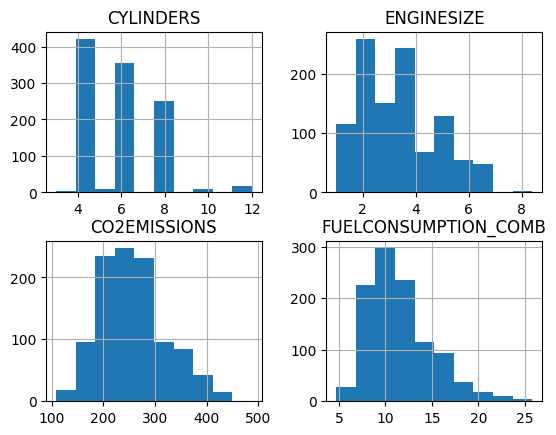

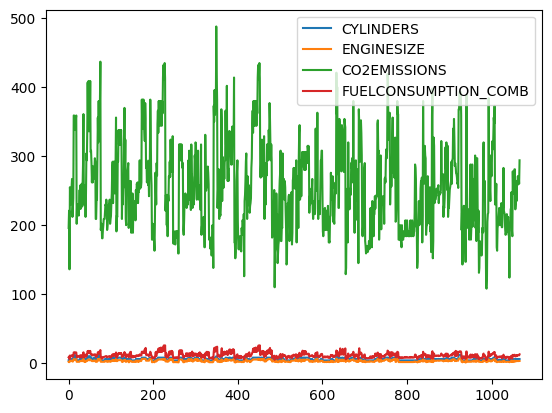

In [35]:
# visualize data using histogram using PANDAS
viz = cdf[["CYLINDERS","ENGINESIZE","CO2EMISSIONS","FUELCONSUMPTION_COMB"]]
viz.hist()
viz.plot()


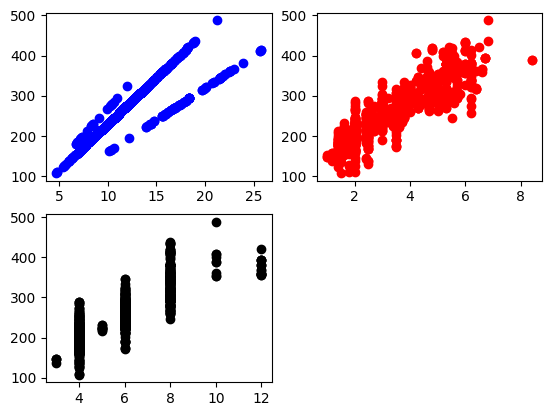

In [36]:
# Visualize using scatter plots
# using 2 dimension plot independent versus dependent variable

fig = plt.figure()

plt.subplot(2,2,1) #subplot 2x2 first quadrant
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="blue")
plt.subplot(2,2,2) #subplot 2x2 second quadrant
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="red")
plt.subplot(2,2,3) #subplot 2x2 third quadrant
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="black")

train dataset:       ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0            2.0          4                   8.5           196
1            2.4          4                   9.6           221
2            1.5          4                   5.9           136
3            3.5          6                  11.1           255
4            3.5          6                  10.6           244
...          ...        ...                   ...           ...
1062         3.0          6                  11.8           271
1063         3.2          6                  11.5           264
1064         3.0          6                  11.8           271
1065         3.2          6                  11.3           260
1066         3.2          6                  12.8           294

[854 rows x 4 columns] Length of train dataset: 854
test dataset:       ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
7            3.7          6                  11.1           255
8            3.7      

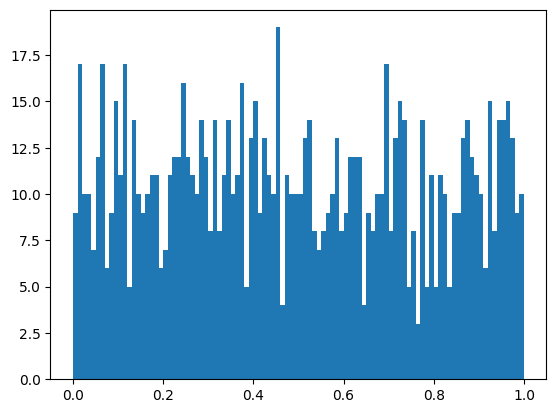

In [37]:
# TRAINING DATASET AND SPLITING
np.random.seed(0) #set the seed to obtain the same random values
rand_samp = np.random.rand(len(df))

#Plotting random values between o and 1
plt.hist(rand_samp, bins=100)

np.random.seed(0)
msk = np.random.rand(len(df)) < 0.8 #applying a mask to get 80% ofo the values to train

# for i in range(100): print("mask",msk[i])

train = cdf[msk] #apply filter to get train samples
test = cdf[~msk] #get test samples using ~ to negate

# main object is to use 80% of the whole dataset to train our linear regression model
# then use 20% of the dataset to test our model

# checking the result of our mask application
print("train dataset:",train,"Length of train dataset:",len(train))
print("test dataset:",test,"Length of test dataset:",len(test))
print("Percentage of train dataset against full dataset", len(train)/(len(train)+len(test)))

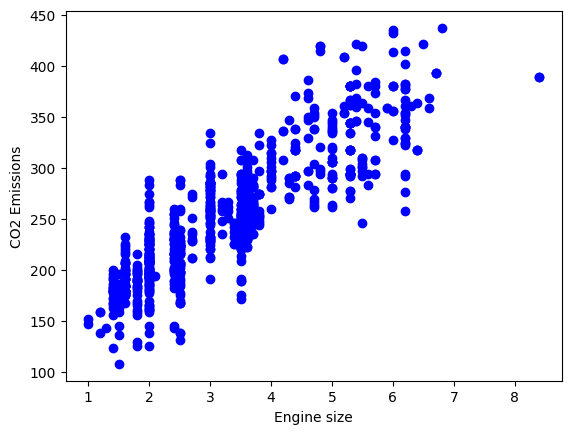

In [38]:
# visualize training data for ENGINE SIZE VS CO2 EMISSIONS
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= "blue")
plt.xlabel("Engine size")
plt.ylabel("CO2 Emissions")
plt.show()

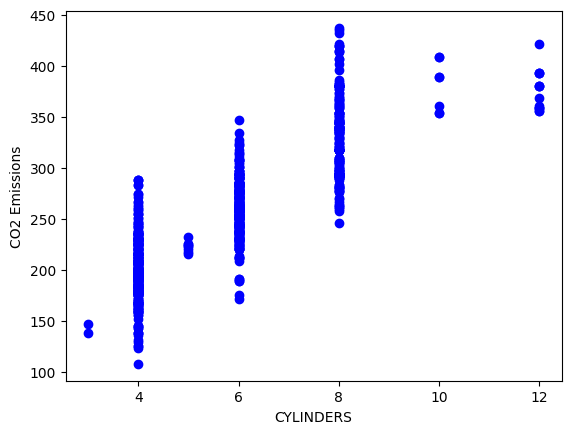

In [39]:
# visualize training data for CYLINDERS VS CO2 EMISSIONS
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color= "blue")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 Emissions")
plt.show()

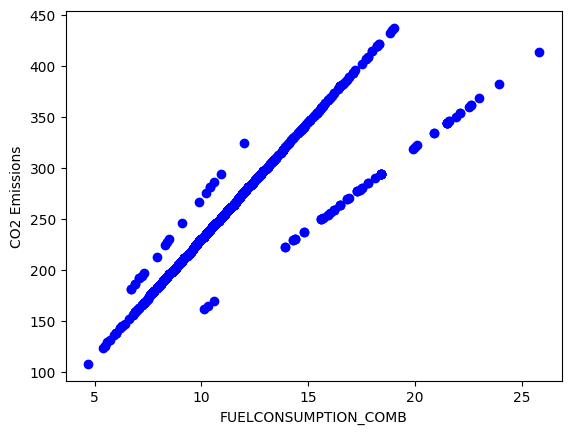

In [40]:
# visualize training data for FUELCONSUMPTION_COMB VS CO2 EMISSIONS
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color= "blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 Emissions")
plt.show()

# FITTING and LINEAR REGRESSION APPLICATION SECTION

Using **sklearn library** and **linear regression model**  

I am also splitting my training and testing dataset into 3 different steps, because we have 3 different _independent variables_ against one _dependent_ variable.

Thats the reason why those variable declarations below are necessary, so it can be easily used with a general function and pass our data as **function arguments**.

In [41]:
# using sklearn library
regr = linear_model.LinearRegression()

# GETTING TRAINING and TESTING DATA FOR INDEPENDENT VARIABLES
train_x_engine = np.asanyarray(train[["ENGINESIZE"]])
train_x_fuel = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
train_x_cylinders = np.asanyarray(train[["CYLINDERS"]])
test_x_engine = np.asanyarray(test[["ENGINESIZE"]])
test_x_fuel = np.asanyarray(test[["FUELCONSUMPTION_COMB"]])
test_x_cylinders = np.asanyarray(test[["CYLINDERS"]])
# train_x = np.array(train[["ENGINESIZE"]]) ALTERNATIVE FOR ASANYARRAY

# GETTING TRAINING AND TESTING DATA FOR DEPENDENT VARIABLE
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
test_y =  np.asanyarray(test[["CO2EMISSIONS"]])

### Python general function definition

**Next, I am defining a general python function, to easily pass down simple function arguments and reduce code repetition**

The function is called _ my regression function_ and accepts 7 different arguments:  
* datax: x axis data
* datay: y axis data
* label_axis_x: x axis label and dataset COLUMN NAME
* label_axis_y: y axis label and DEPENDENT variable NAME
* is_testing: Boolean value that simply says if we are training or testing
* main_color: for plotter usage
* secondary_color: for plotter usage


In [42]:
#%% DEFINING GENERAL FUNCTION FOR LINEAR REGRESSION 
def my_regression_function(datax, datay, label_axis_x, label_axis_y, is_testing,main_color,secondary_color):
    ### FITTING SECTION
    plt.figure()
    regr.fit(datax, datay)
    teta0 = regr.intercept_
    teta1 = regr.coef_
    plt.scatter(datax, datay, color=main_color)
    datay_ = regr.predict(datax)
    plt.plot(datax,datay_,linewidth=3,color=secondary_color)
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)
    if is_testing:
        plt.title("LINEAR REGRESSION - TESTING DATA")
    else:
        plt.title("LINEAR REGRESSION - TRAINING DATA")
    
    
    ## MSE - EVALUATION ERROR SECTION 
    MSE = []
    x = df[label_axis_x]
    y = df[label_axis_y]
    theta_vect = np.linspace(-100,250,500) #set theta space
    for theta in theta_vect:
        aux = 1/len(x) * np.sum((y-theta*x)**2) #MSE
        MSE.append(aux)
    plt.figure()
    plt.plot(theta_vect,MSE,"r",linewidth=2)
    plt.xlabel("theta")
    plt.ylabel("MSE")
    plt.title("MSE - CONVEX FUNCTION")
    
    #EVALUATION RESULT
    # ERRORS USING NUMPY FUNCTIONS
    print("EVALUATION of LINEAR REGRESSION ERRORS",label_axis_x, is_testing)
    print("Mean absolute error: %.2f", np.mean(np.absolute(datay_ - datay)))
    print("Residual sum of squares (MSE): %.2f",np.mean((datay_ - datay) ** 2))
    print("R2-score: %.2f" % r2_score(datay_ , datay))
    print("root mean squared error (RMSE): %.2f" % np.sqrt(np.mean((datay_ - datay) ** 2)))
    print("USING SKLEARN")
    print("Residual sum of squares (scikit MSE): %.2f" % mean_squared_error(datay_ , datay))
    rmse = mean_squared_error(datay_ , datay, squared = False)
    print("Root mean squared Errors (RMSE): %.2f" % rmse)
    print()

### TRAINING and TESTING SECTION - ENGINE SIZE VS CO2

Results and interpretation

EVALUATION of LINEAR REGRESSION ERRORS ENGINESIZE False
Mean absolute error: %.2f 23.27785602587268
Residual sum of squares (MSE): %.2f 948.0918953520672
R2-score: 0.67
root mean squared error (RMSE): 30.79
USING SKLEARN
Residual sum of squares (scikit MSE): 948.09
Root mean squared Errors (RMSE): 30.79

EVALUATION of LINEAR REGRESSION ERRORS ENGINESIZE True
Mean absolute error: %.2f 23.546222105593447
Residual sum of squares (MSE): %.2f 913.6143582119997
R2-score: 0.75
root mean squared error (RMSE): 30.23
USING SKLEARN
Residual sum of squares (scikit MSE): 913.61
Root mean squared Errors (RMSE): 30.23



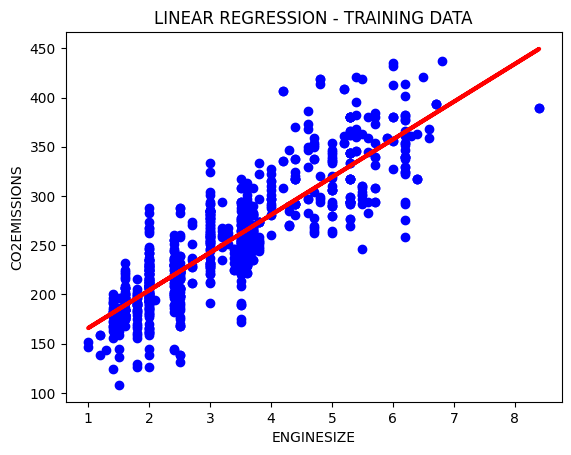

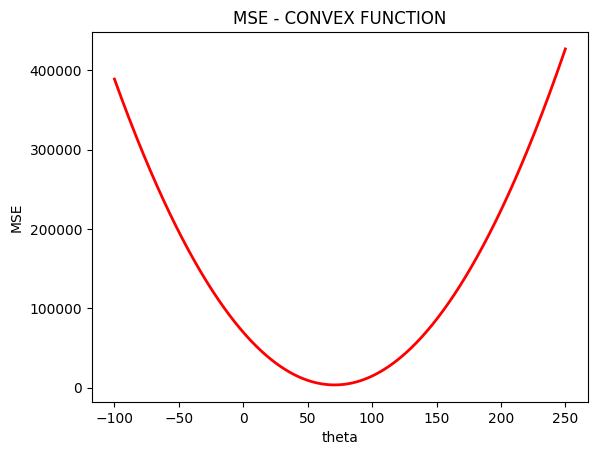

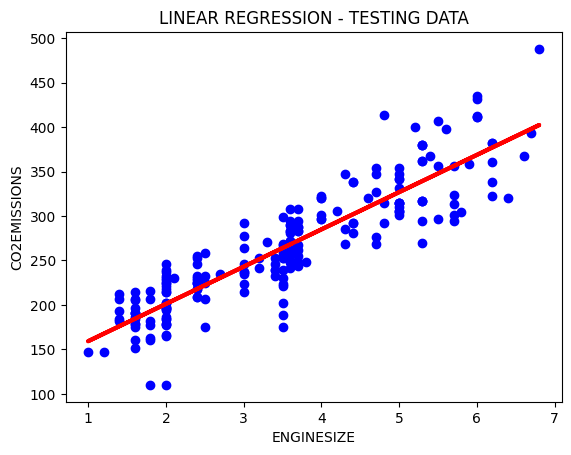

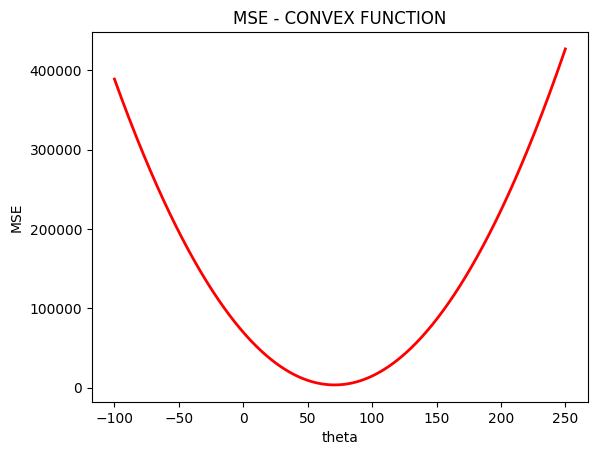

In [43]:
# TRAINING and TESTING SECTION - ENGINE SIZE VS CO2
my_regression_function(train_x_engine,train_y,"ENGINESIZE","CO2EMISSIONS",False,"blue","red")
my_regression_function(test_x_engine, test_y,"ENGINESIZE","CO2EMISSIONS",True,"blue","red")

## TRAINING and TESTING SECTION - FUELCONSUMPTION_COMB VS CO2

Results and interpretation

EVALUATION of LINEAR REGRESSION ERRORS FUELCONSUMPTION_COMB False
Mean absolute error: %.2f 19.200277342839428
Residual sum of squares (MSE): %.2f 763.2382177046077
R2-score: 0.75
root mean squared error (RMSE): 27.63
USING SKLEARN
Residual sum of squares (scikit MSE): 763.24
Root mean squared Errors (RMSE): 27.63

EVALUATION of LINEAR REGRESSION ERRORS FUELCONSUMPTION_COMB True
Mean absolute error: %.2f 24.03167535692154
Residual sum of squares (MSE): %.2f 1020.5434837214964
R2-score: 0.71
root mean squared error (RMSE): 31.95
USING SKLEARN
Residual sum of squares (scikit MSE): 1020.54
Root mean squared Errors (RMSE): 31.95



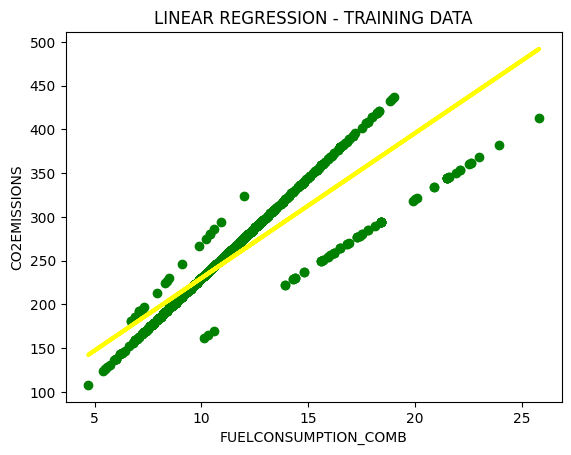

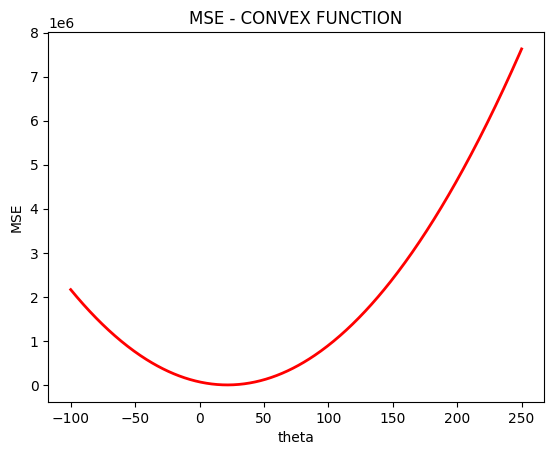

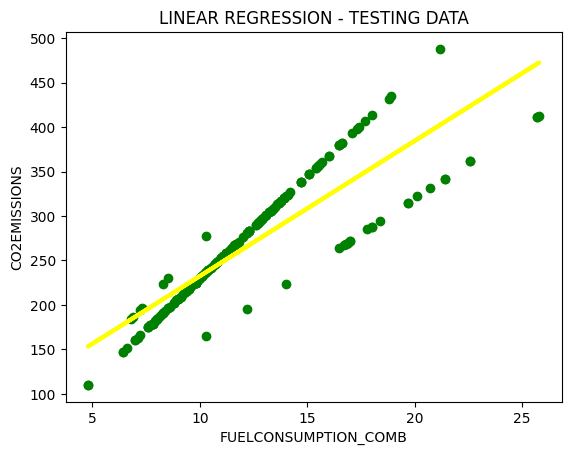

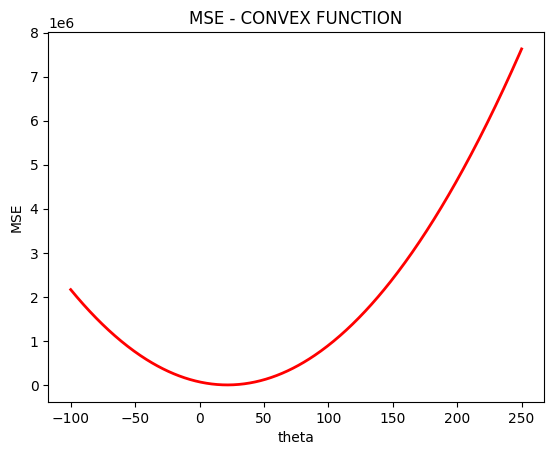

In [44]:
#TRAINING and TESTING SECTION - FUELCONSUMPTION_COMB VS CO2
my_regression_function(train_x_fuel,train_y,"FUELCONSUMPTION_COMB","CO2EMISSIONS",False,"green","yellow")
my_regression_function(test_x_fuel,test_y,"FUELCONSUMPTION_COMB","CO2EMISSIONS",True,"green","yellow")

## TRAINING and TESTING SECTION - CYLINDERS VS CO2

Result and interpretation

EVALUATION of LINEAR REGRESSION ERRORS CYLINDERS False
Mean absolute error: %.2f 25.368345709124412
Residual sum of squares (MSE): %.2f 1077.7529185315855
R2-score: 0.61
root mean squared error (RMSE): 32.83
USING SKLEARN
Residual sum of squares (scikit MSE): 1077.75
Root mean squared Errors (RMSE): 32.83

EVALUATION of LINEAR REGRESSION ERRORS CYLINDERS True
Mean absolute error: %.2f 27.16891051691204
Residual sum of squares (MSE): %.2f 1242.498232835043
R2-score: 0.63
root mean squared error (RMSE): 35.25
USING SKLEARN
Residual sum of squares (scikit MSE): 1242.50
Root mean squared Errors (RMSE): 35.25



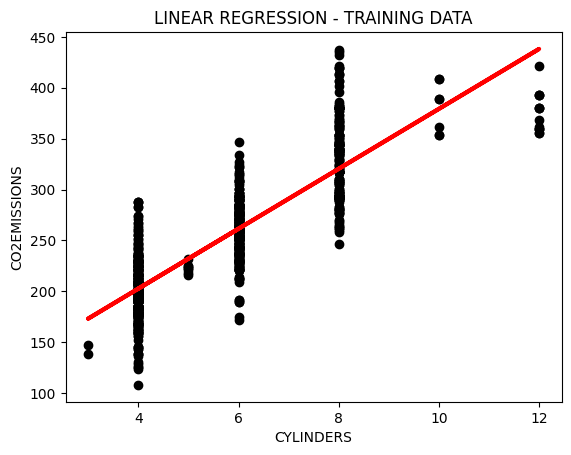

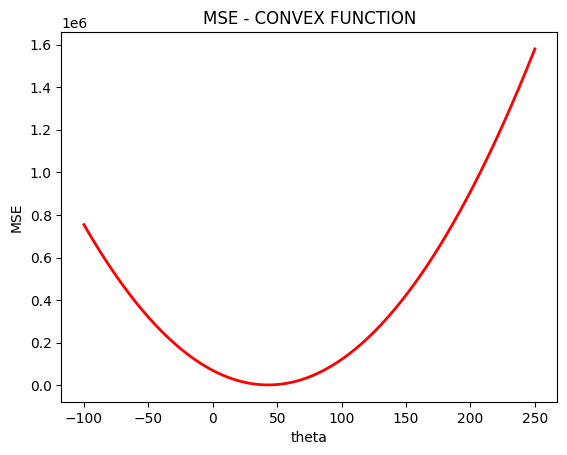

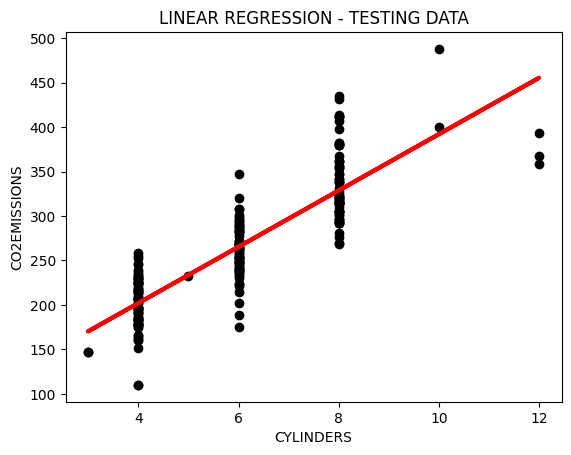

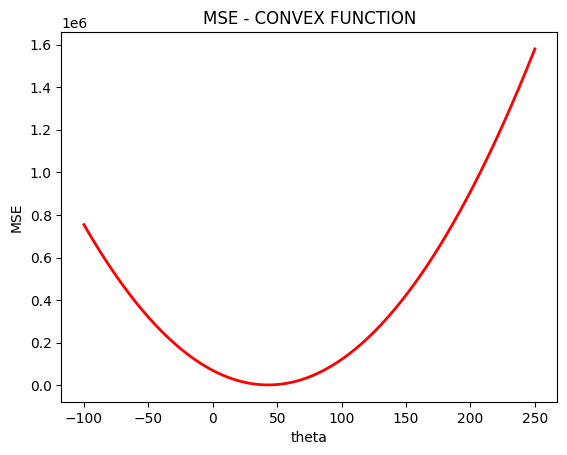

In [45]:
#TRAINING and TESTING SECTION - CYLINDERS VS CO2
my_regression_function(train_x_cylinders,train_y,"CYLINDERS","CO2EMISSIONS",False,"black","red")
my_regression_function(test_x_cylinders,test_y,"CYLINDERS","CO2EMISSIONS",True,"black","red")

## Conclusion